# Data Visualization and Statistics

## Libraries and Configurations

Import configuration files

In [34]:
from configparser import ConfigParser

config = ConfigParser()
config.read("config.ini")

['config.ini']

Import **data libraries**

In [35]:
import pandas as pd

# Import label encoder
from sklearn import preprocessing

Import **other libraries**

In [36]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x1111485d0>>

Custom helper scripts

In [37]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks
/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/data_exploration_cleaning


/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Data

In [38]:
# Combined dataframe raw
combined_df_csv = config["DEFAULT"]["interim_path"] + "combined_df.csv"

In [39]:
combined_df = pd.read_csv(combined_df_csv)

/var/folders/kz/mqbx964j4w53vxgzd7rlzx380000gn/T/ipykernel_17425/3840082691.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv(combined_df_csv)


Fixing columns data types

In [40]:
combined_df.dtypes

Timestamp                    object
MAC Address                  object
Channel                       int64
DS Channel                  float64
HT Capabilities              object
Extended Capabilities        object
Vendor Specific Tags         object
SSID                         object
Supported Rates              object
Extended Supported Rates     object
VHT Capabilities             object
HE Capabilities              object
Label                        object
dtype: object

In [41]:
# Converting Timestamp to datetime
combined_df["Timestamp"] = pd.to_datetime(combined_df["Timestamp"])

# Converting Label to string
combined_df["Label"] = combined_df["Label"].astype(str)

# Converting SSID to string
combined_df["SSID"] = combined_df["SSID"].astype(str)

# Converting MAC Address to string
combined_df["MAC Address"] = combined_df["MAC Address"].astype(str)

# Converting HT Capabilities to string
combined_df["HT Capabilities"] = combined_df["HT Capabilities"].astype(str)

# Converting Extended Capabilities to string
combined_df["Extended Capabilities"] = combined_df["Extended Capabilities"].astype(str)

# Converting Vendor Specific Tags to string
combined_df["Vendor Specific Tags"] = combined_df["Vendor Specific Tags"].astype(str)

# Converting Supported Rates to string
combined_df["Supported Rates"] = combined_df["Supported Rates"].astype(str)

# Converting Extended Supported Rates to string
combined_df["Extended Supported Rates"] = combined_df[
    "Extended Supported Rates"
].astype(str)

# Converting VHT Capabilities to string
combined_df["VHT Capabilities"] = combined_df["VHT Capabilities"].astype(str)

# Converting HE Capabilities to string
combined_df["HE Capabilities"] = combined_df["HE Capabilities"].astype(str)

**Label encoding** categorical features for better readability. `-1` is kept as is to indicate empty field

In [42]:
combined_df["HT Capabilities"] = encodingHelper.label_encode_with_exception(
    combined_df["HT Capabilities"]
)
combined_df["HE Capabilities"] = encodingHelper.label_encode_with_exception(
    combined_df["HE Capabilities"]
)
combined_df["Extended Capabilities"] = encodingHelper.label_encode_with_exception(
    combined_df["Extended Capabilities"]
)
combined_df["Vendor Specific Tags"] = encodingHelper.label_encode_with_exception(
    combined_df["Vendor Specific Tags"]
)
combined_df["Supported Rates"] = encodingHelper.label_encode_with_exception(
    combined_df["Supported Rates"]
)
combined_df["Extended Supported Rates"] = encodingHelper.label_encode_with_exception(
    combined_df["Extended Supported Rates"]
)
combined_df["VHT Capabilities"] = encodingHelper.label_encode_with_exception(
    combined_df["VHT Capabilities"]
)

## Dataset Balancing

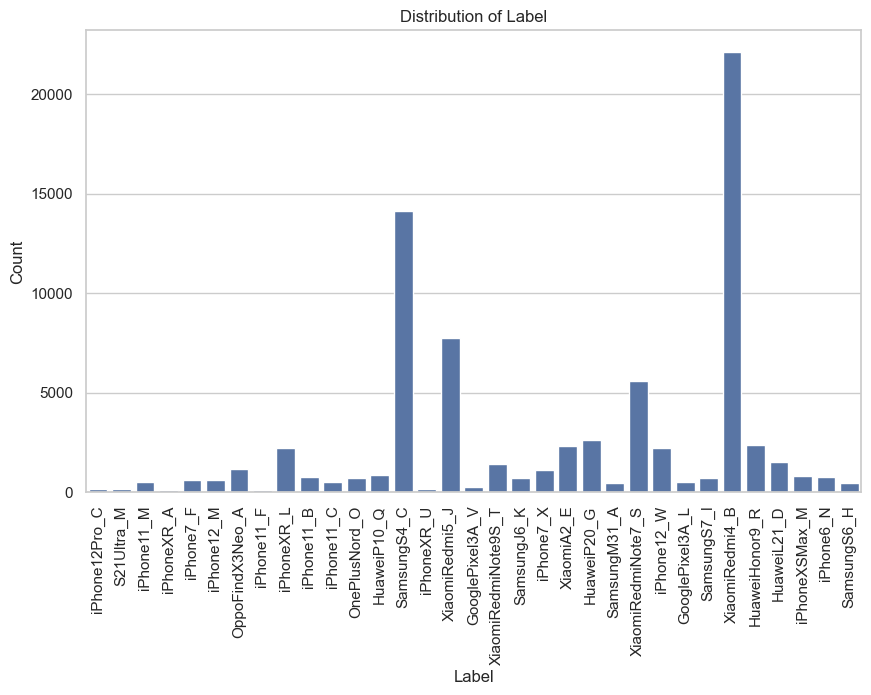

In [43]:
plotHelper.plot_label_distribution(combined_df, "Label")

Average number of rows per label

In [44]:
print("Average number of rows per Label:", combined_df.groupby("Label").size().mean())

Average number of rows per Label: 2324.3636363636365


**Undersampling devices which have too many Probe Request to the average number of rows per label**

In [45]:
# Undersampling devices which have too many Probe Request to the average number of rows per label
# This is done to avoid having an unbalanced dataset

# Get the average number of rows per label
average_rows_per_label = combined_df.groupby("Label").size().mean()

# Get the labels which have more rows than the average
labels_to_undersample = (
    combined_df.groupby("Label")
    .size()[combined_df.groupby("Label").size() > average_rows_per_label]
    .index
)

# Get the labels which have less rows than the average
labels_to_keep = (
    combined_df.groupby("Label")
    .size()[combined_df.groupby("Label").size() <= average_rows_per_label]
    .index
)

# Get the rows which have a label which has more rows than the average
rows_to_undersample = combined_df[combined_df["Label"].isin(labels_to_undersample)]

# Get the rows which have a label which has less rows than the average
rows_to_keep = combined_df[combined_df["Label"].isin(labels_to_keep)]

# Undersample the rows which have a label which has more rows than the average
rows_to_undersample = (
    rows_to_undersample.groupby("Label")
    .apply(lambda x: x.sample(n=round(average_rows_per_label), random_state=42))
    .reset_index(drop=True)
)

# Combine the undersampled rows with the rows which have a label which has less rows than the average
combined_df = pd.concat([rows_to_keep, rows_to_undersample])

/var/folders/kz/mqbx964j4w53vxgzd7rlzx380000gn/T/ipykernel_17425/342106335.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=round(average_rows_per_label), random_state=42))


## Data Visualization

### Data Distribution

In [46]:
combined_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Label
0,2023-05-20 13:52:01.864465952,d2:6b:aa:b5:fb:ed,1,1.0,6,17,-1,-1,2,0,-1,62,iPhone12Pro_C
1,2023-05-20 13:52:01.884716034,d2:6b:aa:b5:fb:ed,1,1.0,6,17,-1,-1,2,0,-1,62,iPhone12Pro_C
2,2023-05-20 13:52:01.910542011,d2:6b:aa:b5:fb:ed,6,6.0,6,17,-1,-1,2,0,-1,62,iPhone12Pro_C
3,2023-05-20 13:52:01.930788994,d2:6b:aa:b5:fb:ed,6,6.0,6,17,-1,-1,2,0,-1,62,iPhone12Pro_C
4,2023-05-20 13:52:01.968745947,d2:6b:aa:b5:fb:ed,11,11.0,6,17,-1,-1,2,0,-1,62,iPhone12Pro_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,2021-07-07 12:02:57.579541922,da:a1:19:00:17:f9,6,1.0,8,7,26,-1,0,0,0,13,XiaomiRedmiNote7_S
13940,2021-07-07 11:32:04.533828019,da:a1:19:1a:cc:8f,6,8.0,8,7,26,Wind3 HUB-6D1619,0,0,0,14,XiaomiRedmiNote7_S
13941,2021-07-07 11:46:50.089955091,da:a1:19:41:c9:b1,11,5.0,8,7,26,-1,0,0,0,32,XiaomiRedmiNote7_S
13942,2021-07-07 12:16:31.309731960,da:a1:19:c7:24:b1,1,3.0,8,7,26,-1,0,0,0,14,XiaomiRedmiNote7_S


Number of Probe Requests entries per device

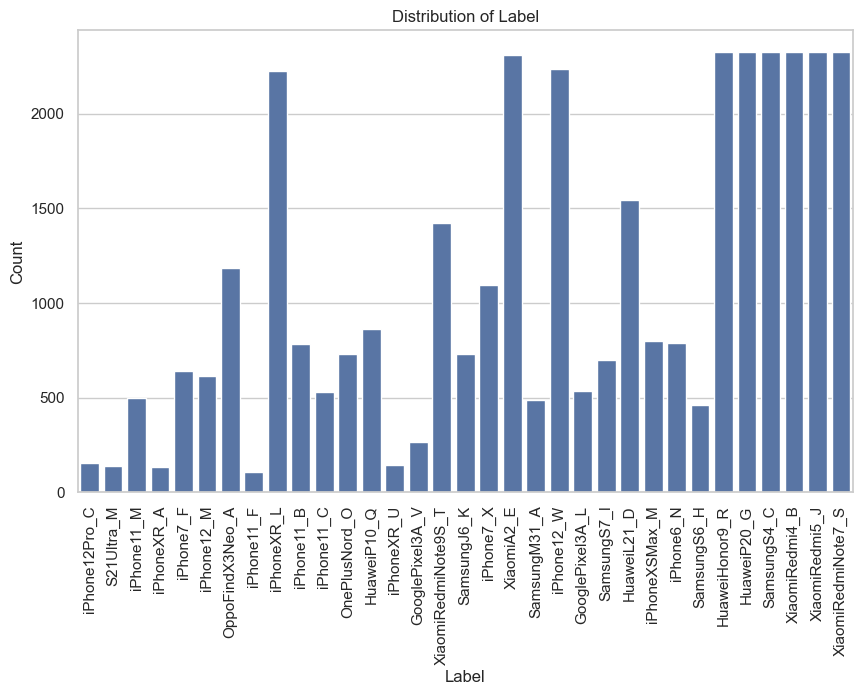

In [47]:
plotHelper.plot_label_distribution(combined_df, "Label")

### SSIDs

Percentage of SSIDs disclosed in Probe Requests.

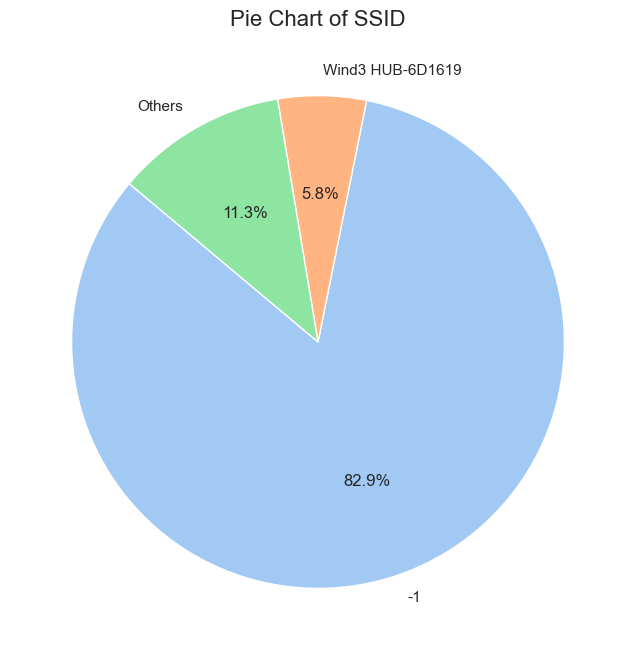

In [48]:
plotHelper.plot_pie_chart(combined_df, "SSID")

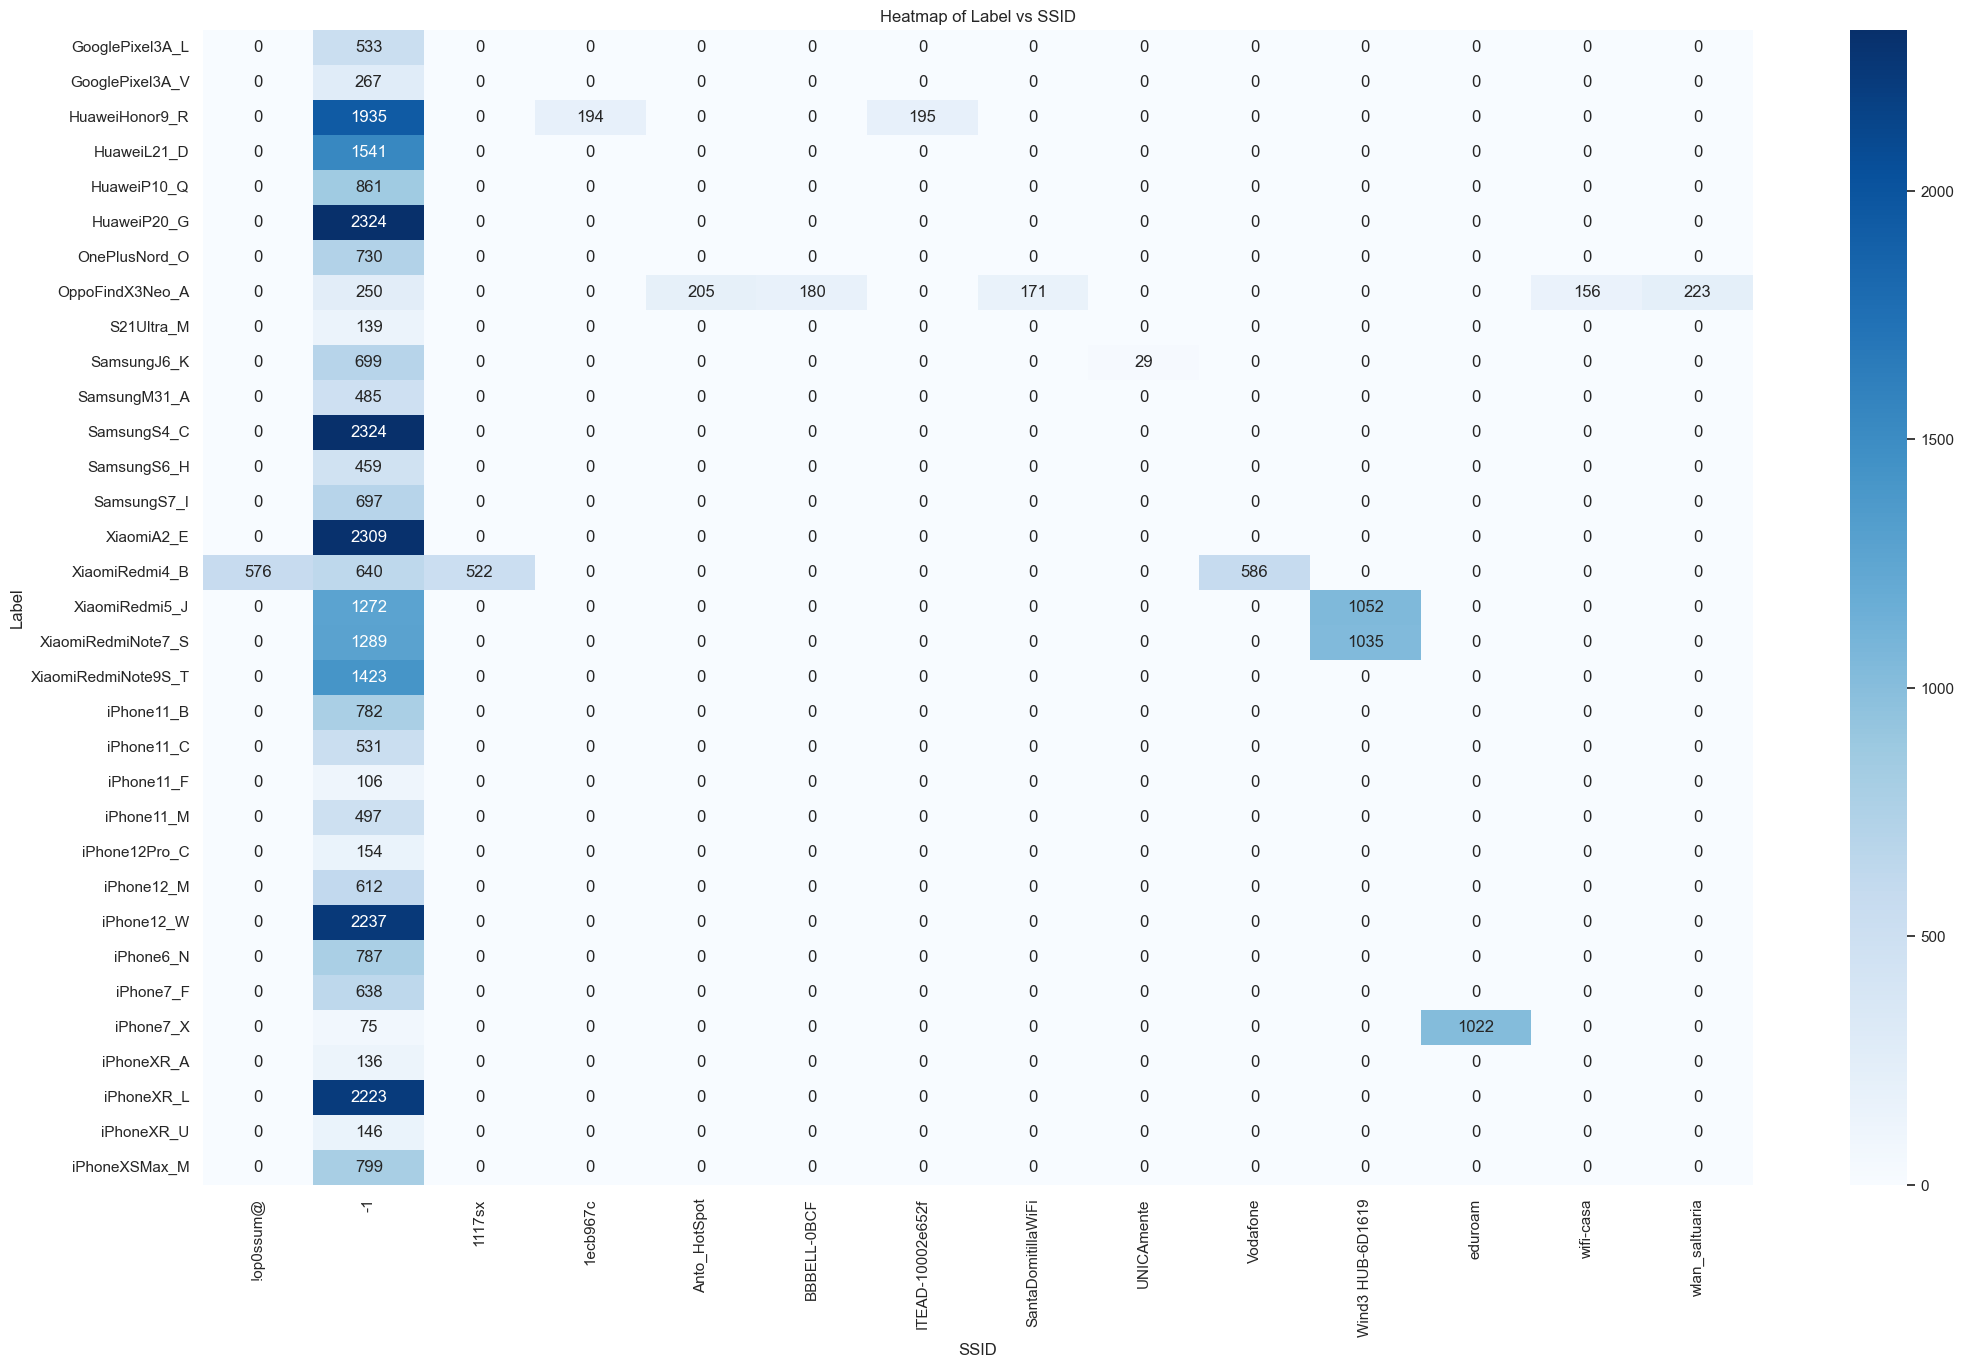

In [49]:
plotHelper.plot_heatmap(combined_df, "Label", "SSID")

### Channel Utilization

`Channel` usage per device

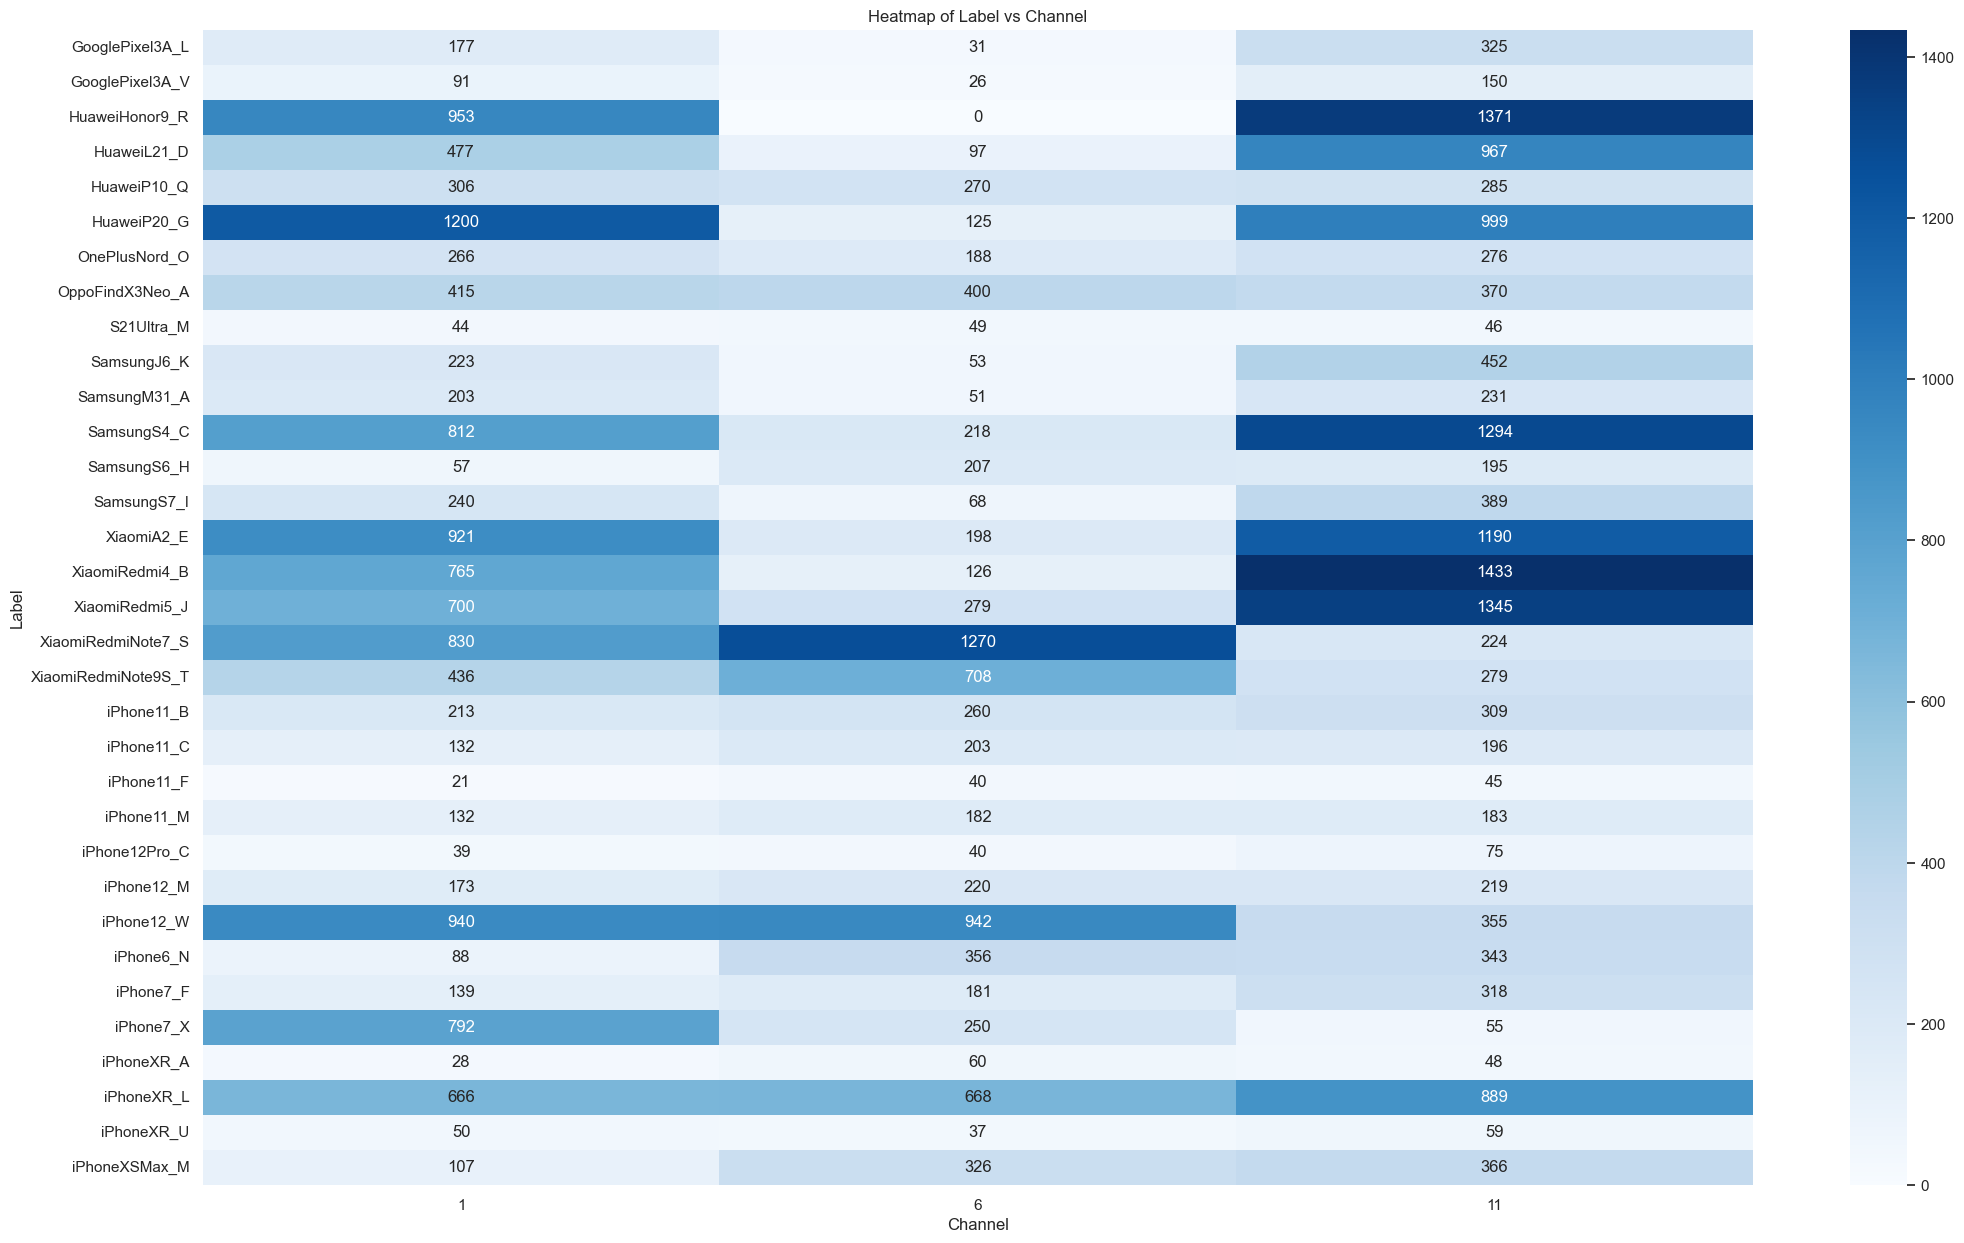

In [50]:
plotHelper.plot_heatmap(combined_df, "Label", "Channel")

`DS Channel` usage per device

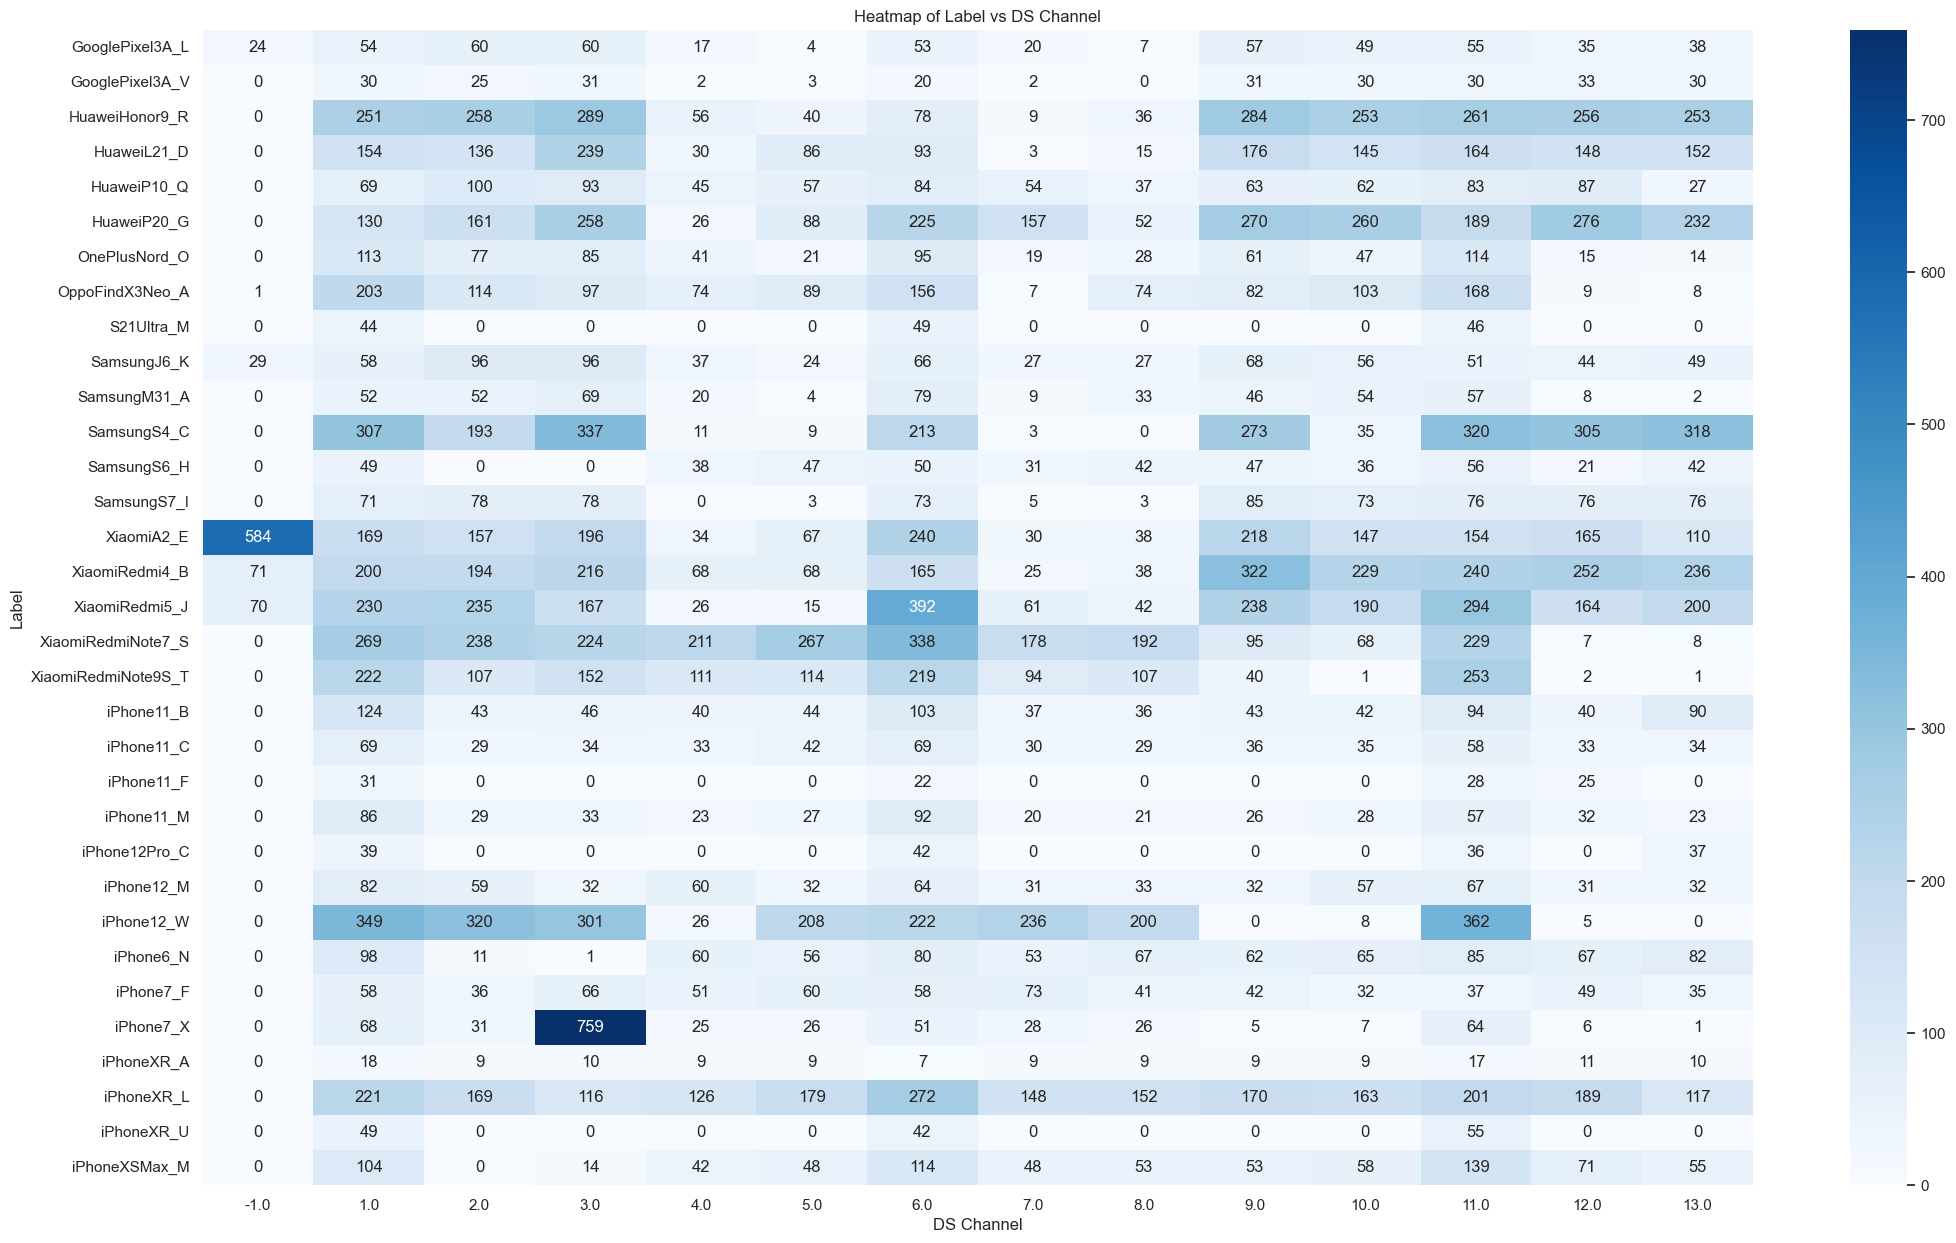

In [51]:
plotHelper.plot_heatmap(combined_df, "Label", "DS Channel")

`DS Channel` parameter distribution on actual `Channel` frequencies.

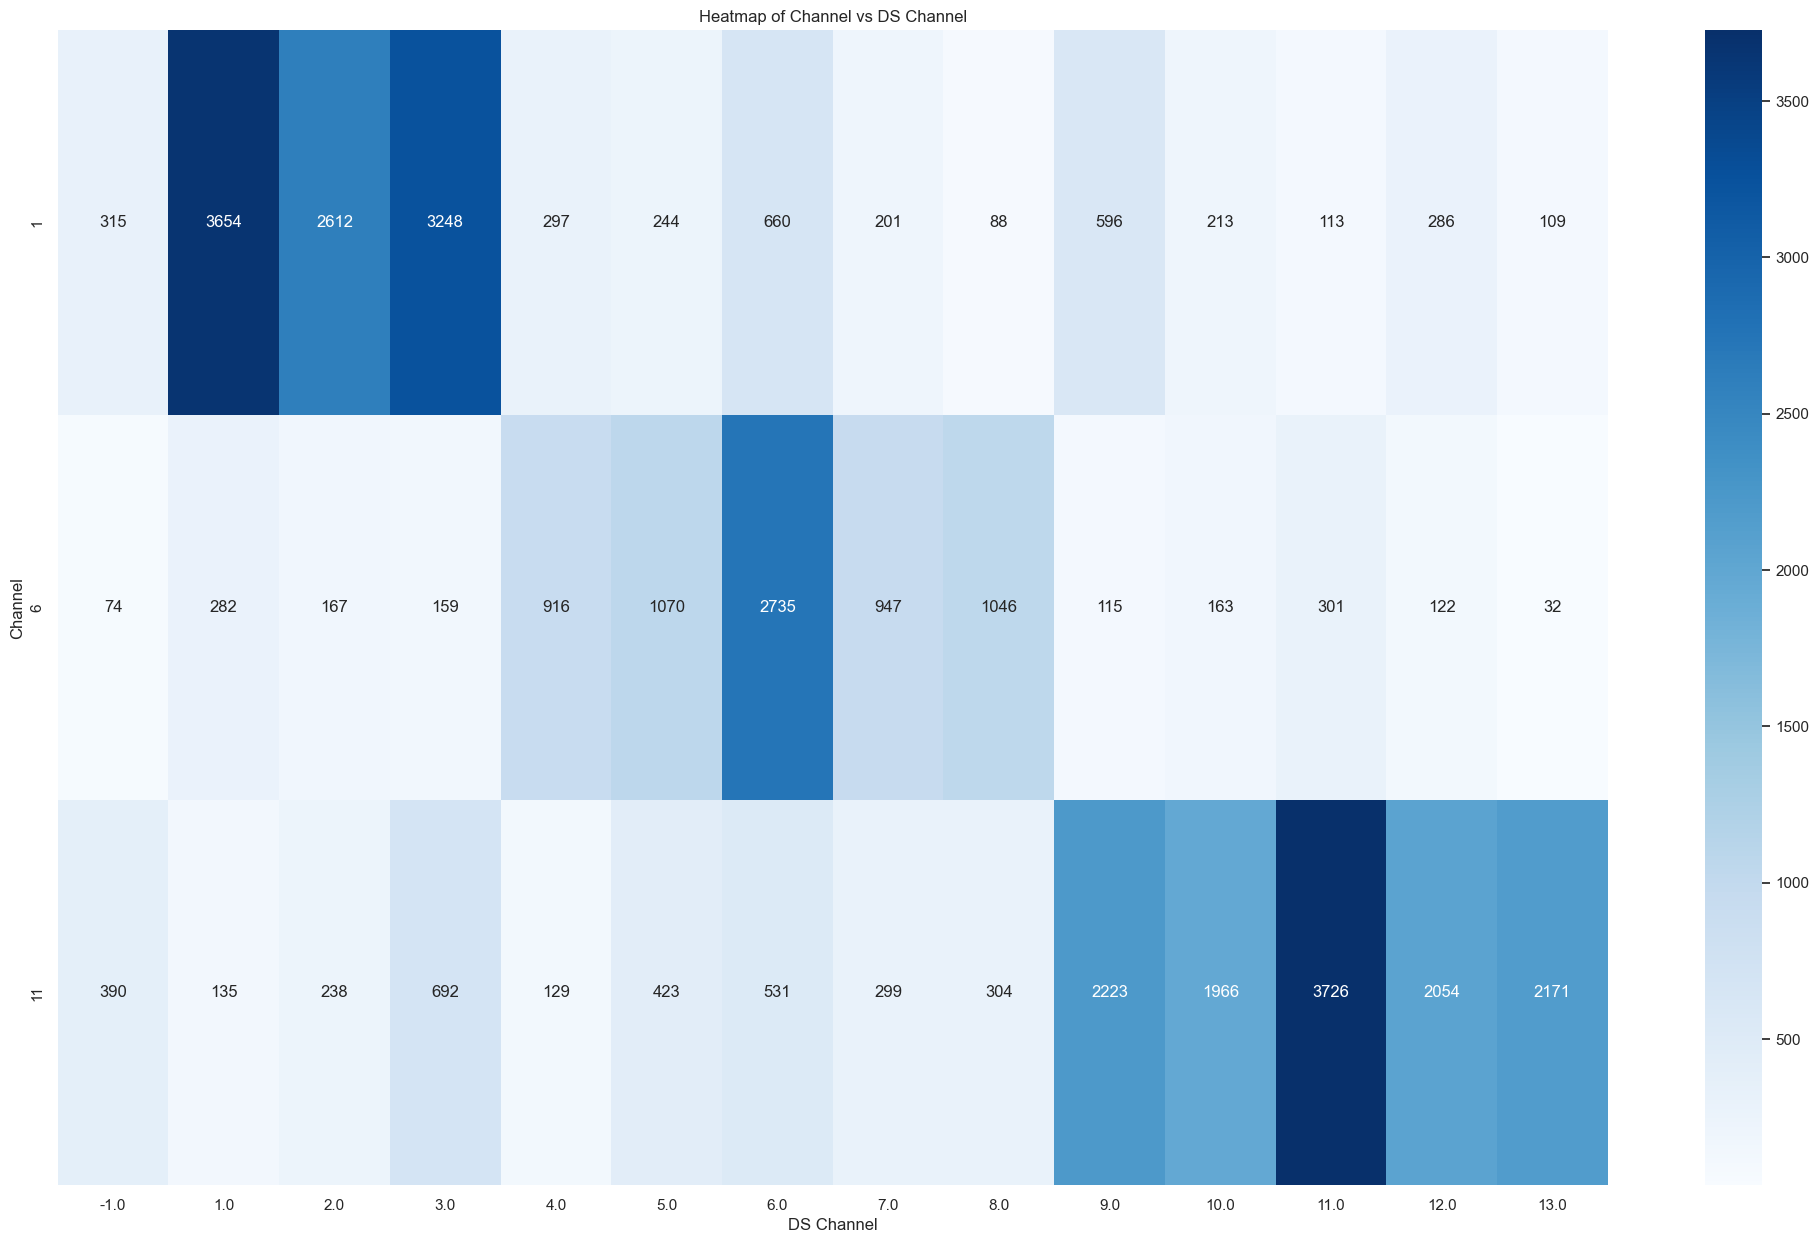

In [52]:
plotHelper.plot_heatmap(combined_df, "Channel", "DS Channel")

### Information Elements

#### HT Capabilities

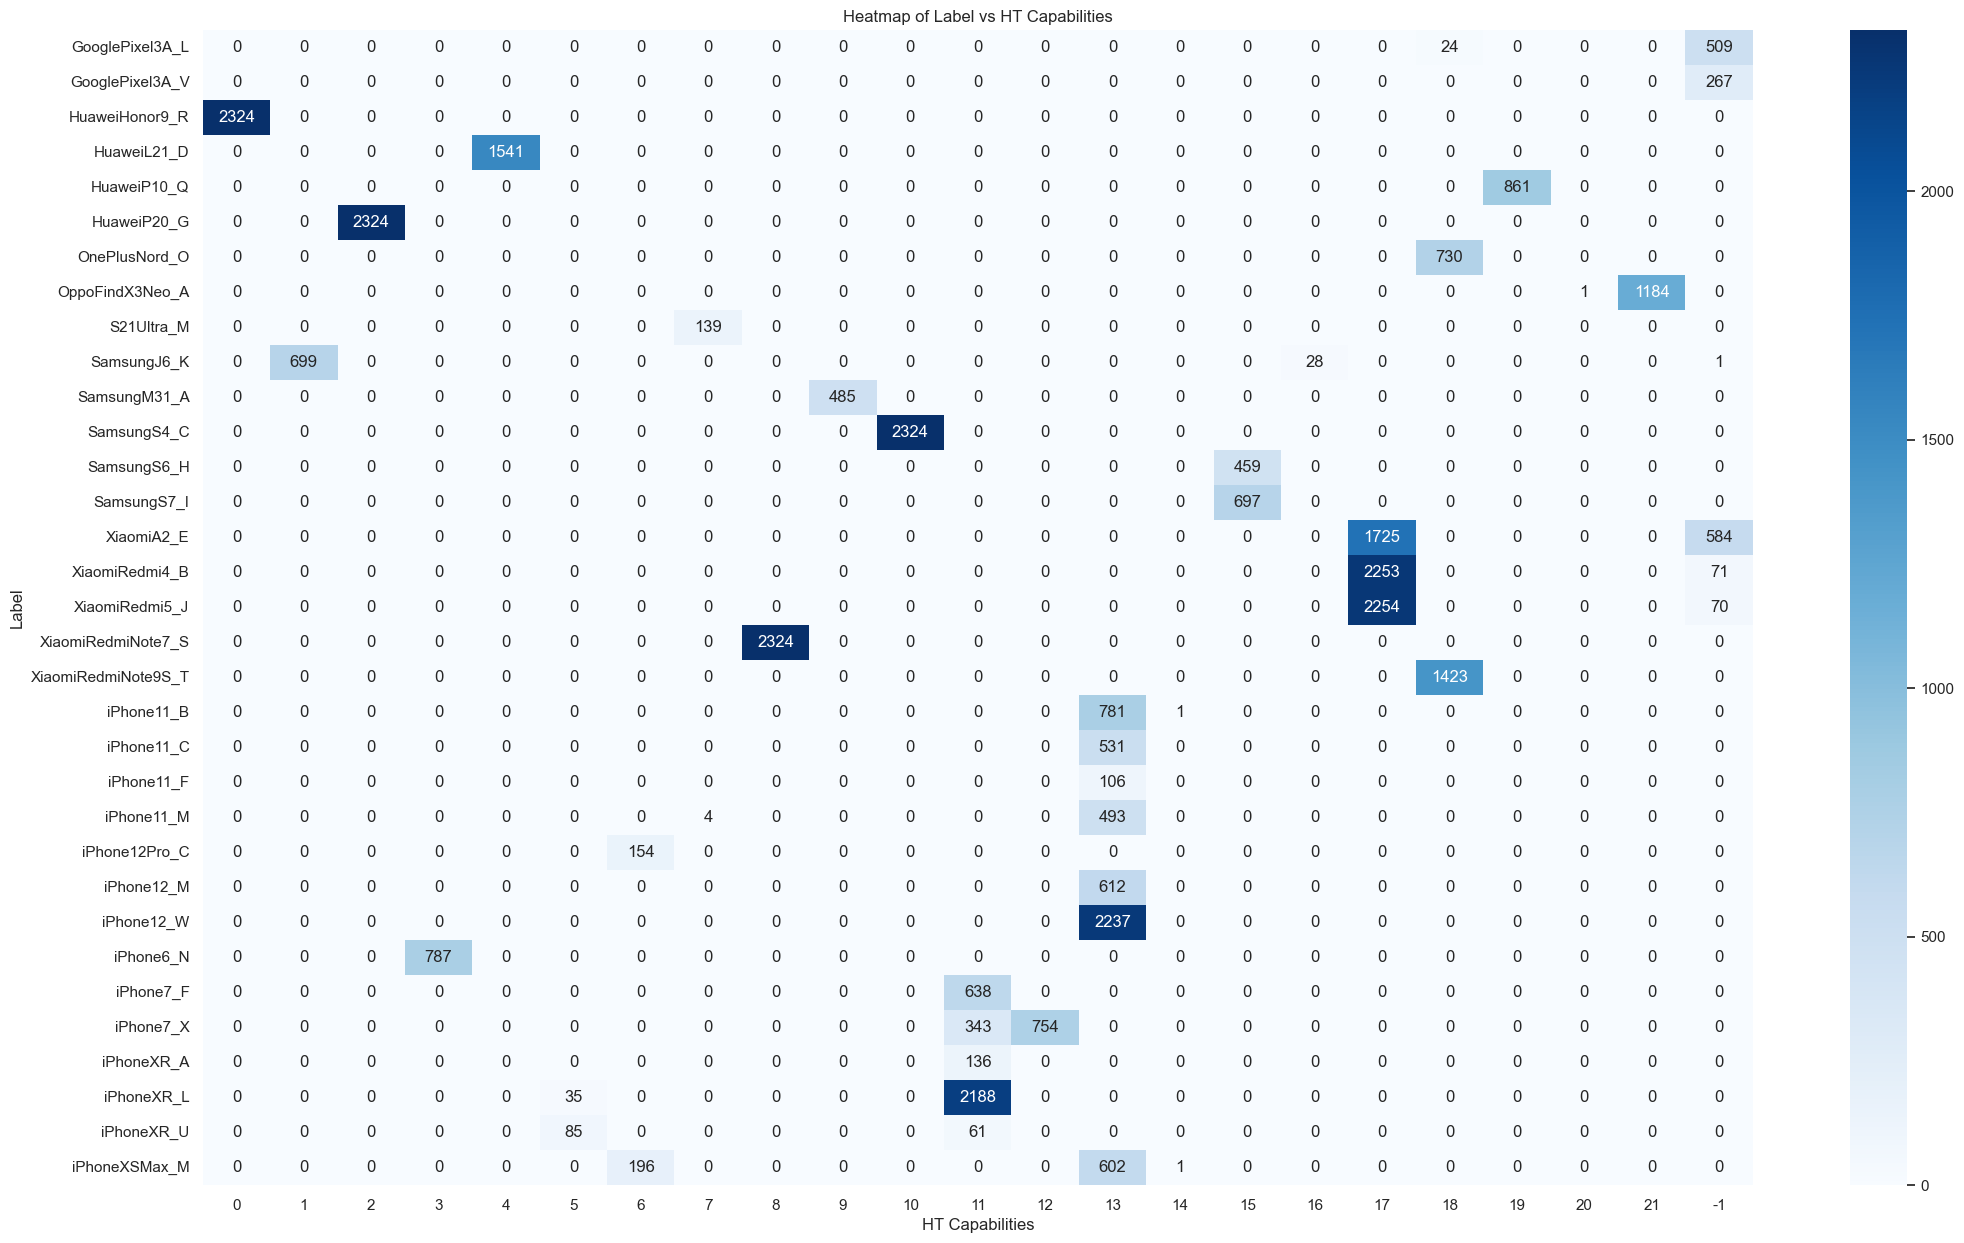

In [53]:
plotHelper.plot_heatmap(combined_df, "Label", "HT Capabilities")

#### HE Capabilities

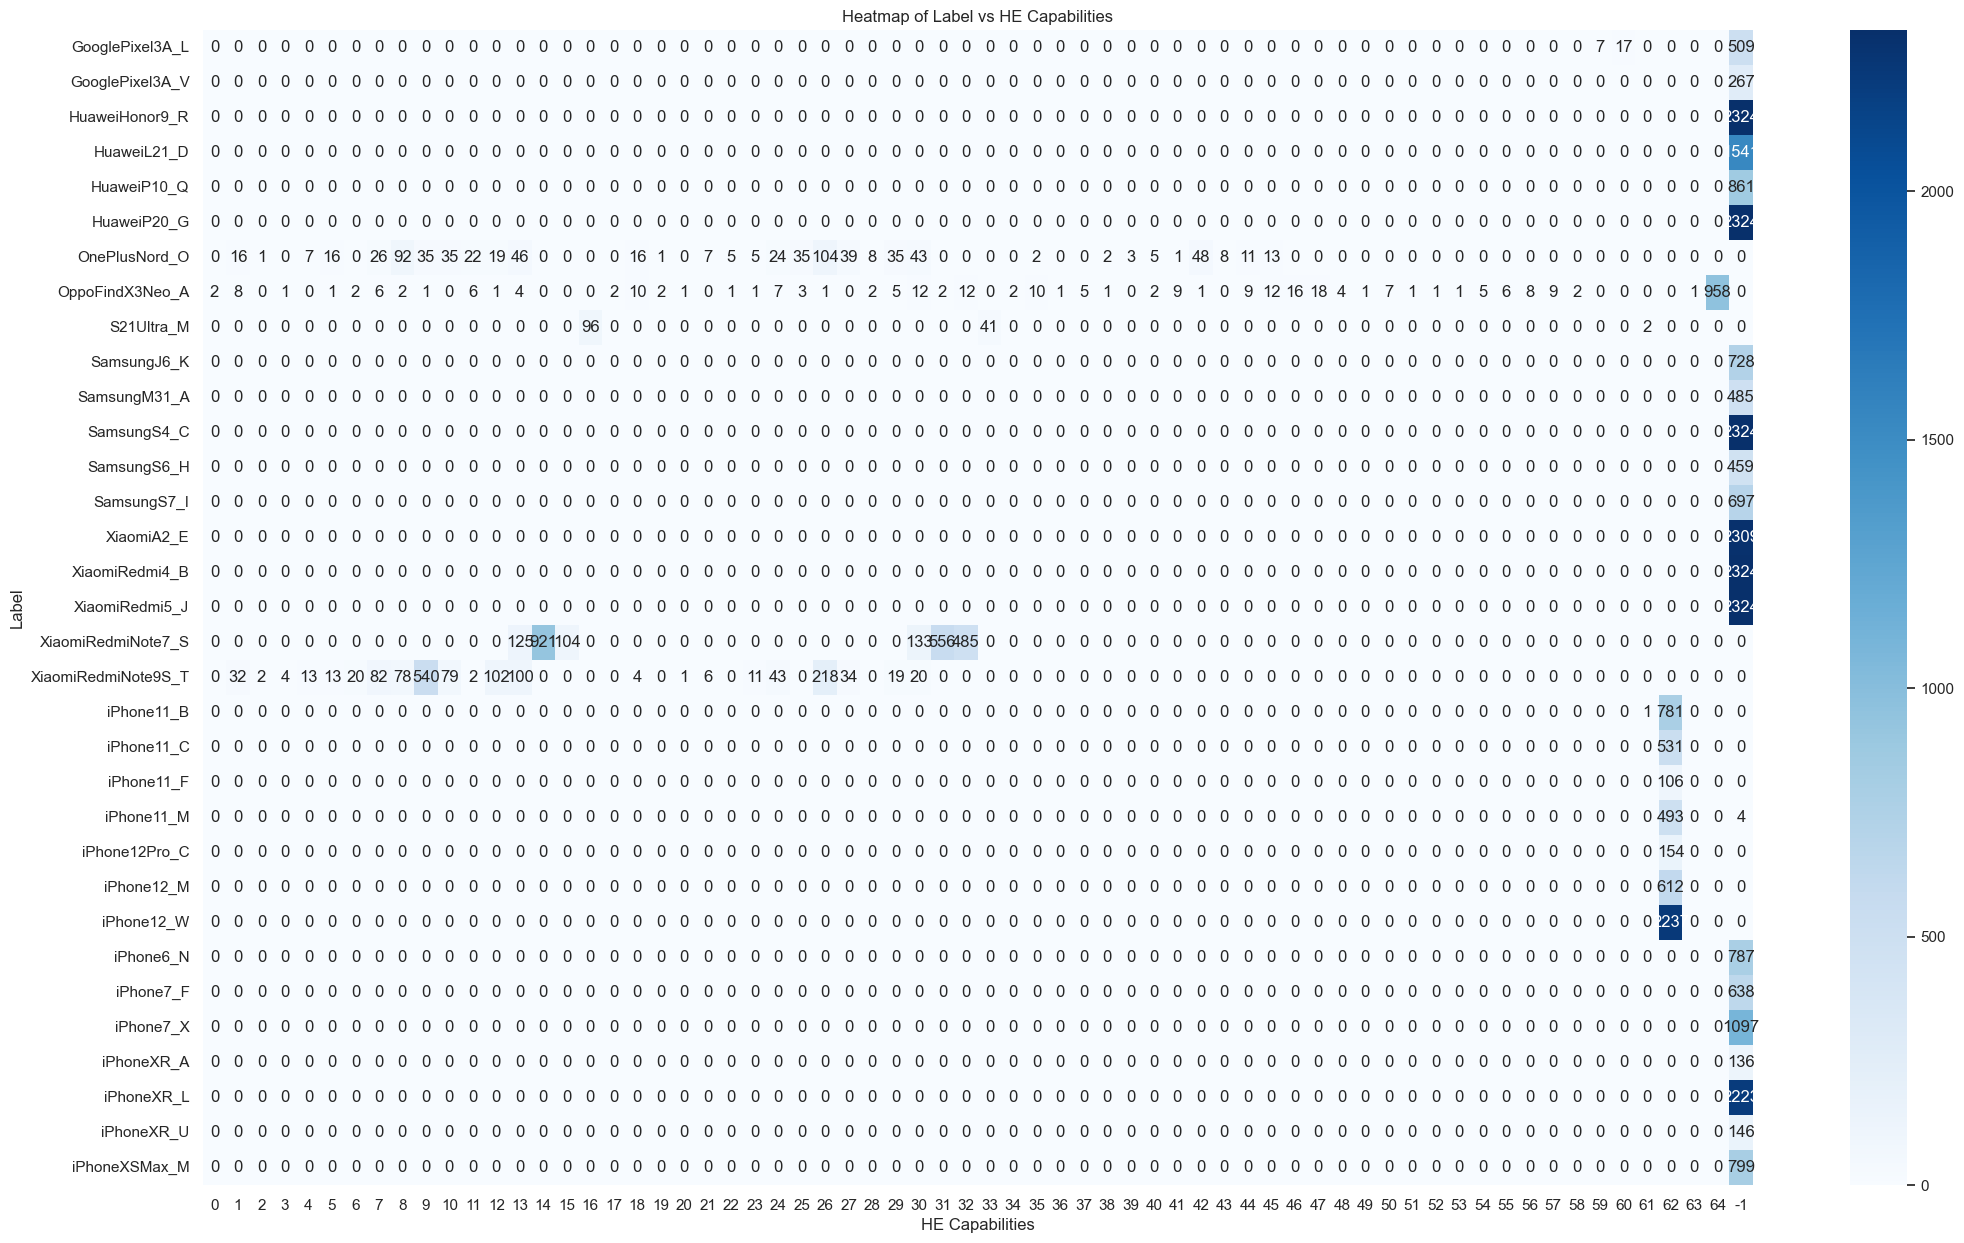

In [54]:
plotHelper.plot_heatmap(combined_df, "Label", "HE Capabilities")

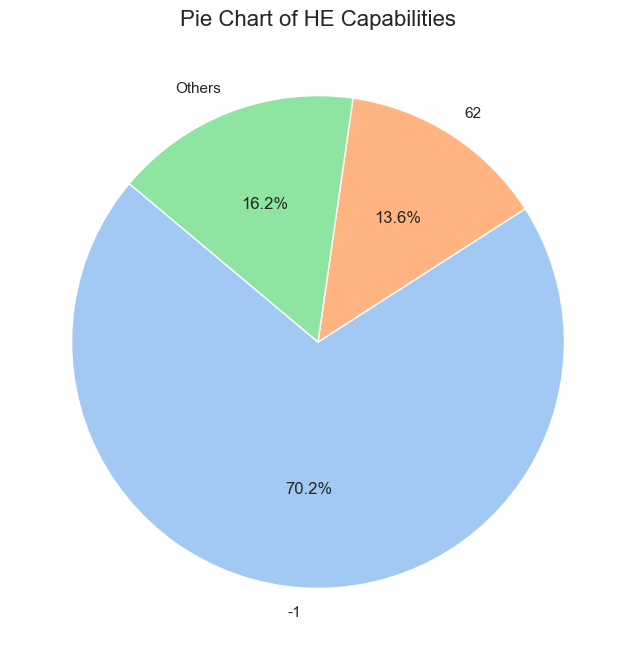

In [55]:
plotHelper.plot_pie_chart(combined_df, "HE Capabilities")

#### Supported Rates

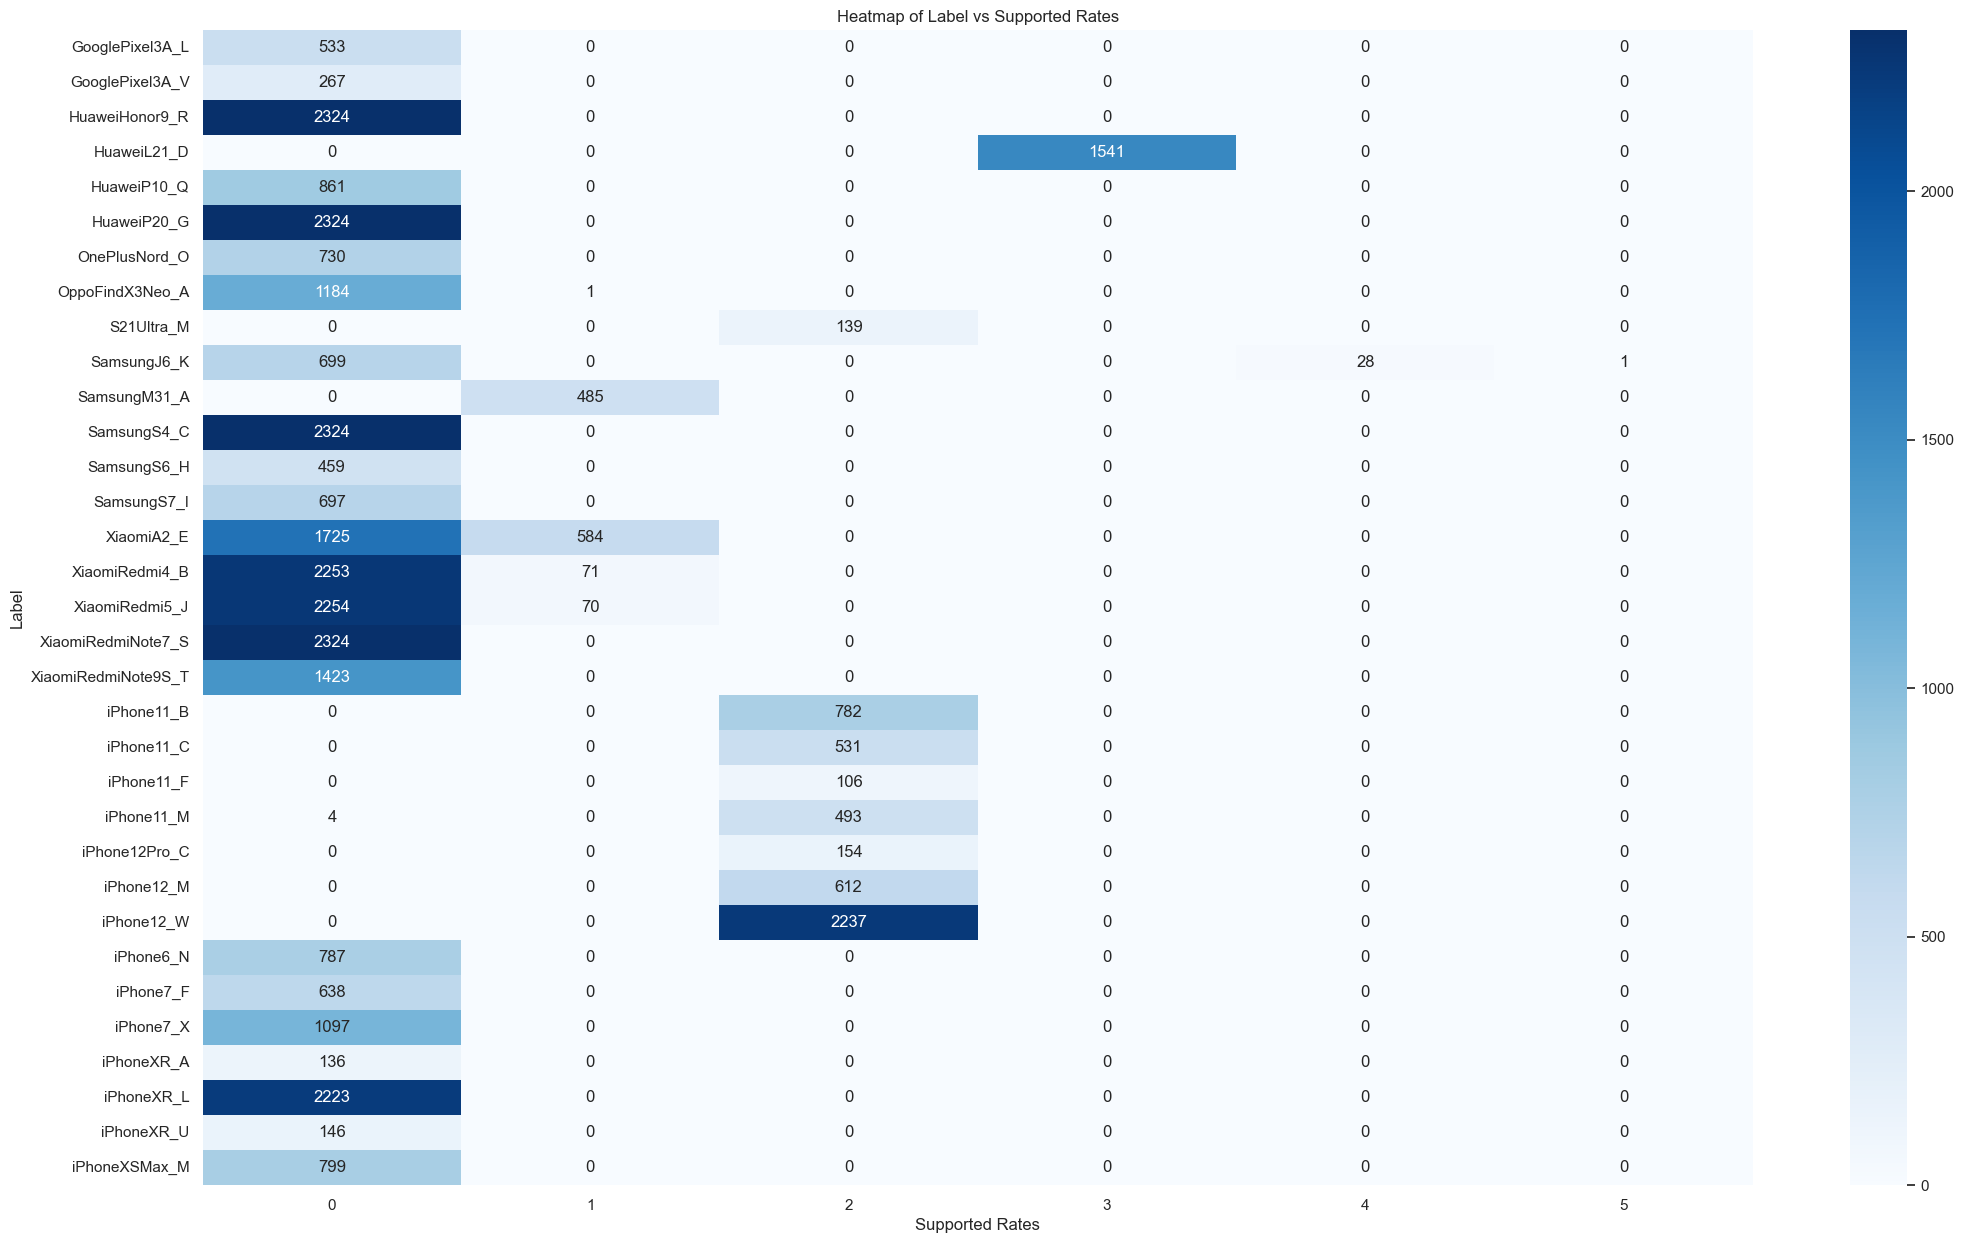

In [56]:
plotHelper.plot_heatmap(combined_df, "Label", "Supported Rates")

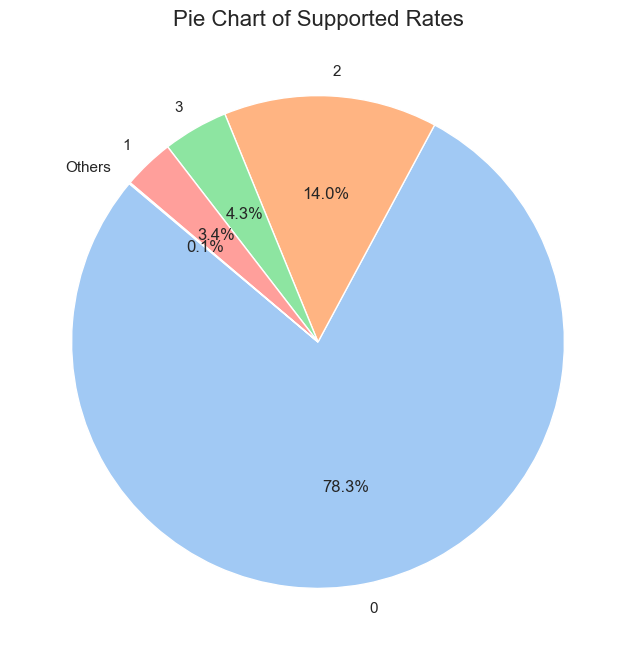

In [66]:
plotHelper.plot_pie_chart(combined_df, "Supported Rates", other_percentage=0.01)

#### Extended Supported Rates

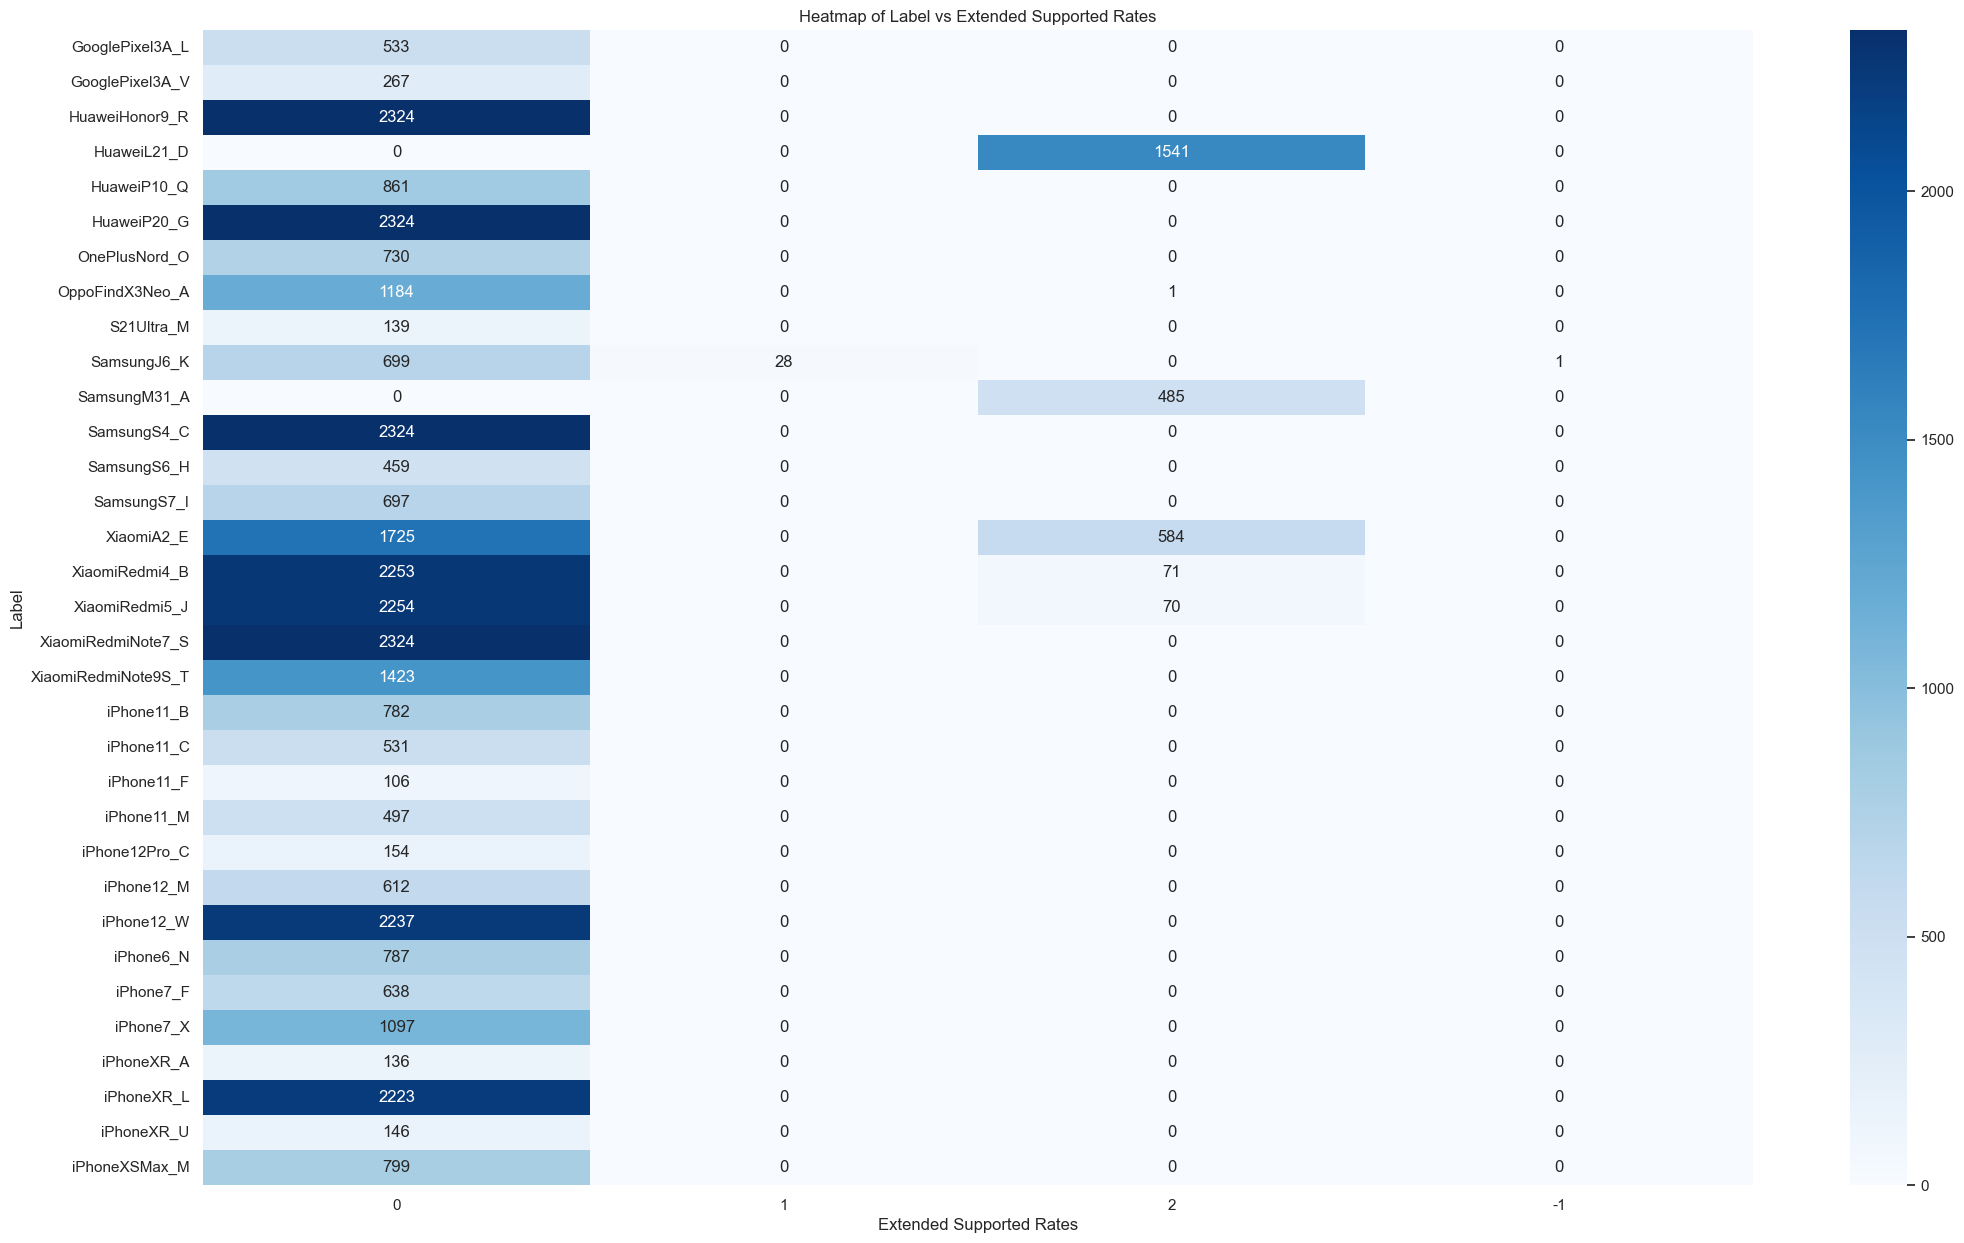

In [58]:
plotHelper.plot_heatmap(combined_df, "Label", "Extended Supported Rates")

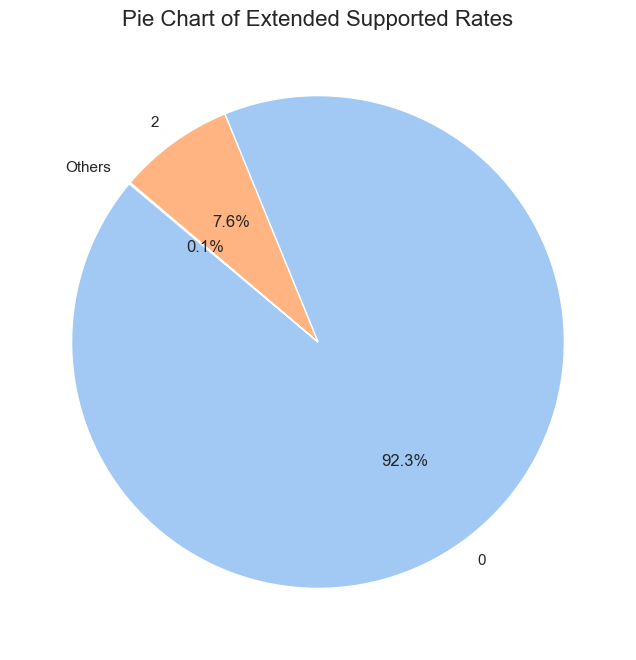

In [59]:
plotHelper.plot_pie_chart(combined_df, "Extended Supported Rates")

#### Vendor Specific Tags

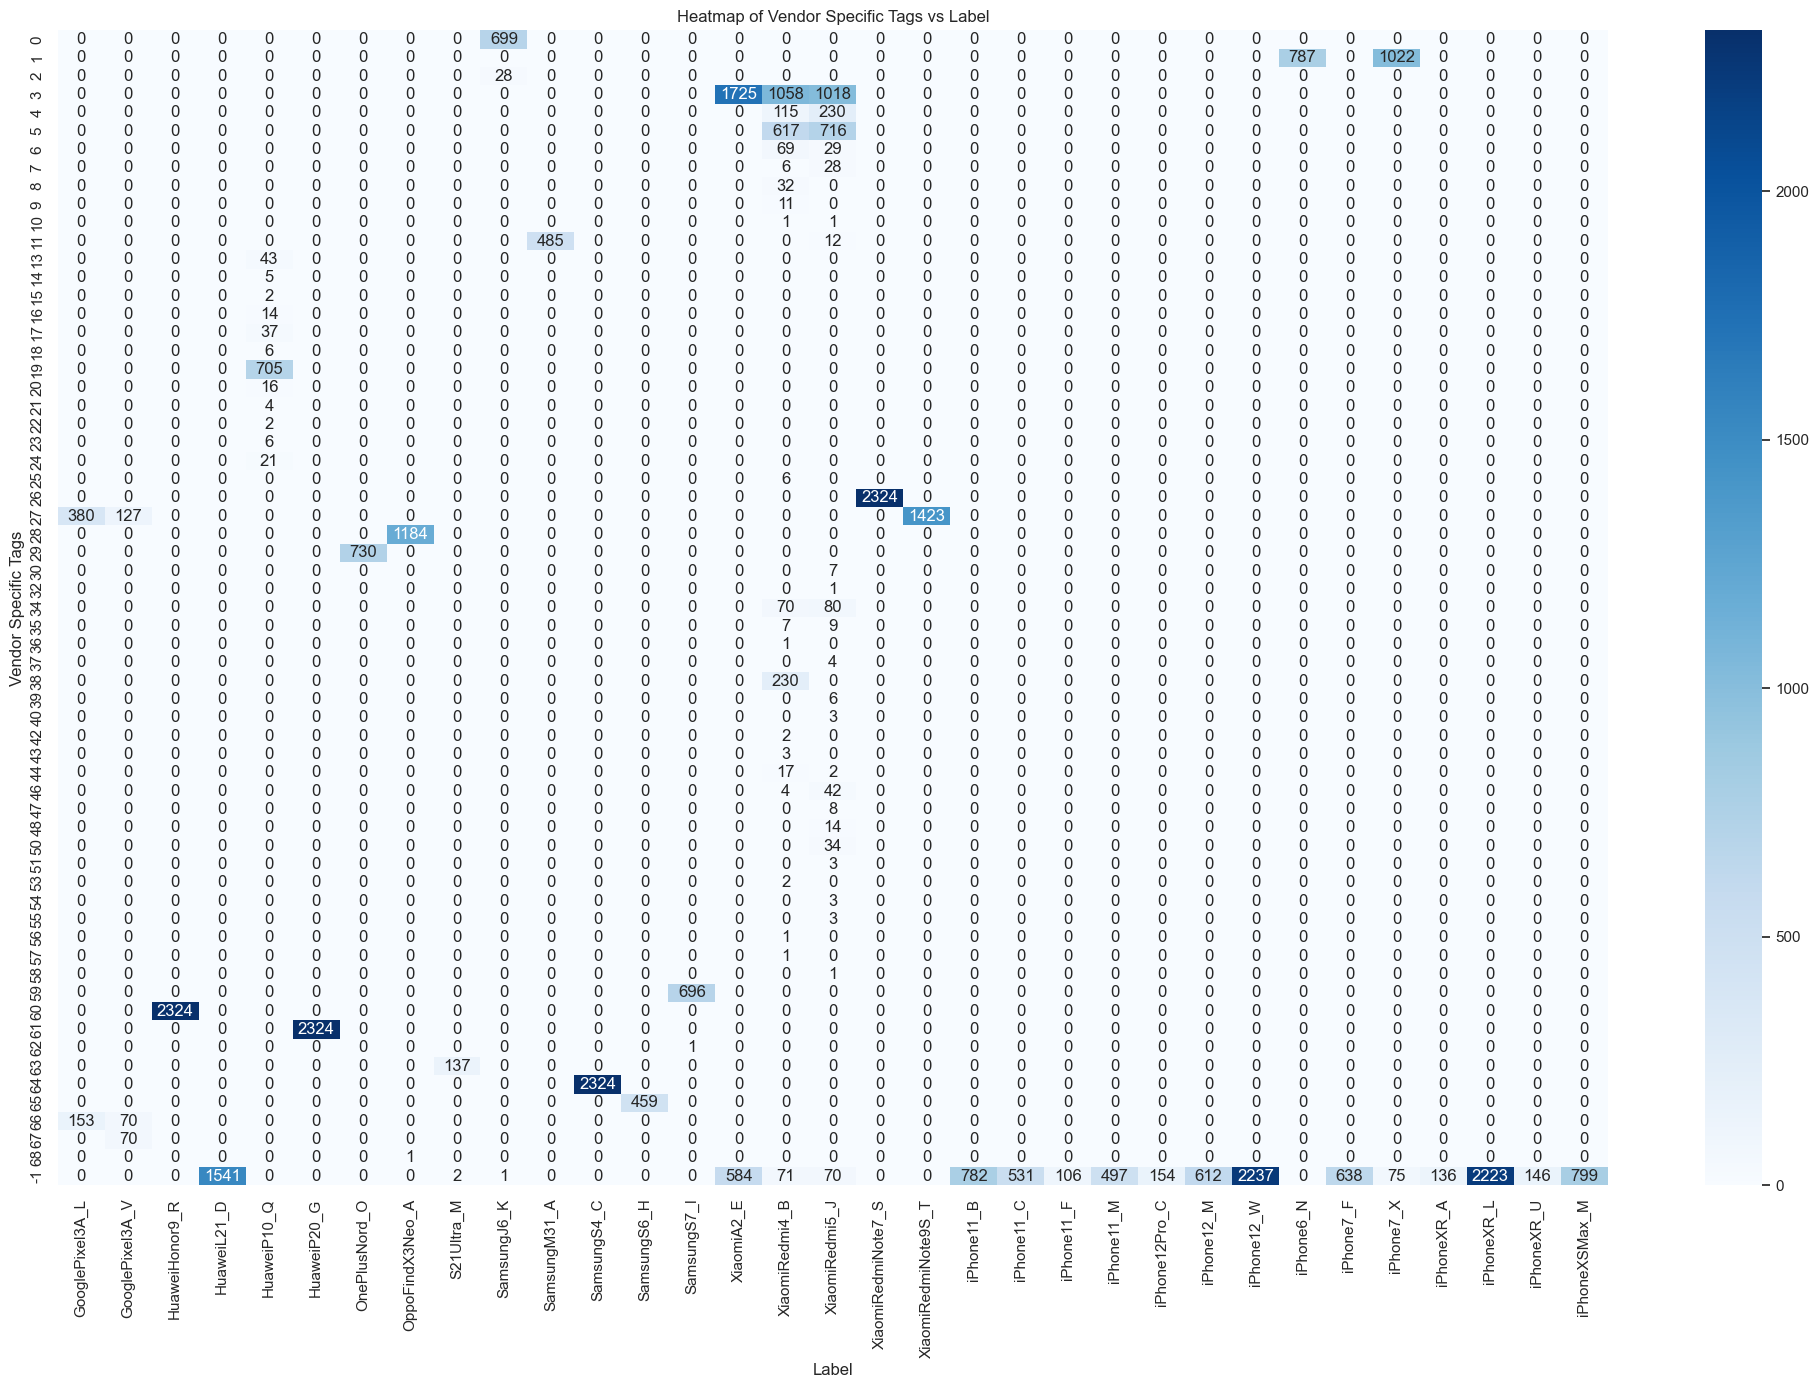

In [60]:
plotHelper.plot_heatmap(combined_df, "Vendor Specific Tags", "Label")

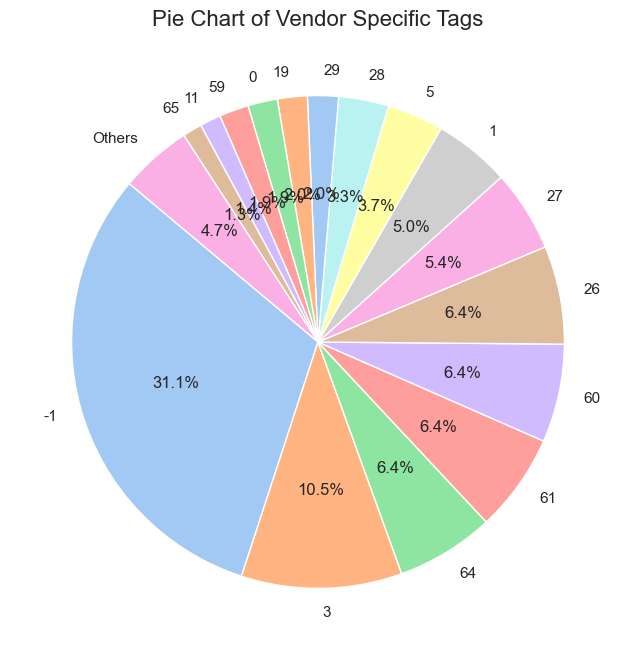

In [61]:
plotHelper.plot_pie_chart(combined_df, "Vendor Specific Tags", other_percentage=0.01)

#### Extended Capabilities

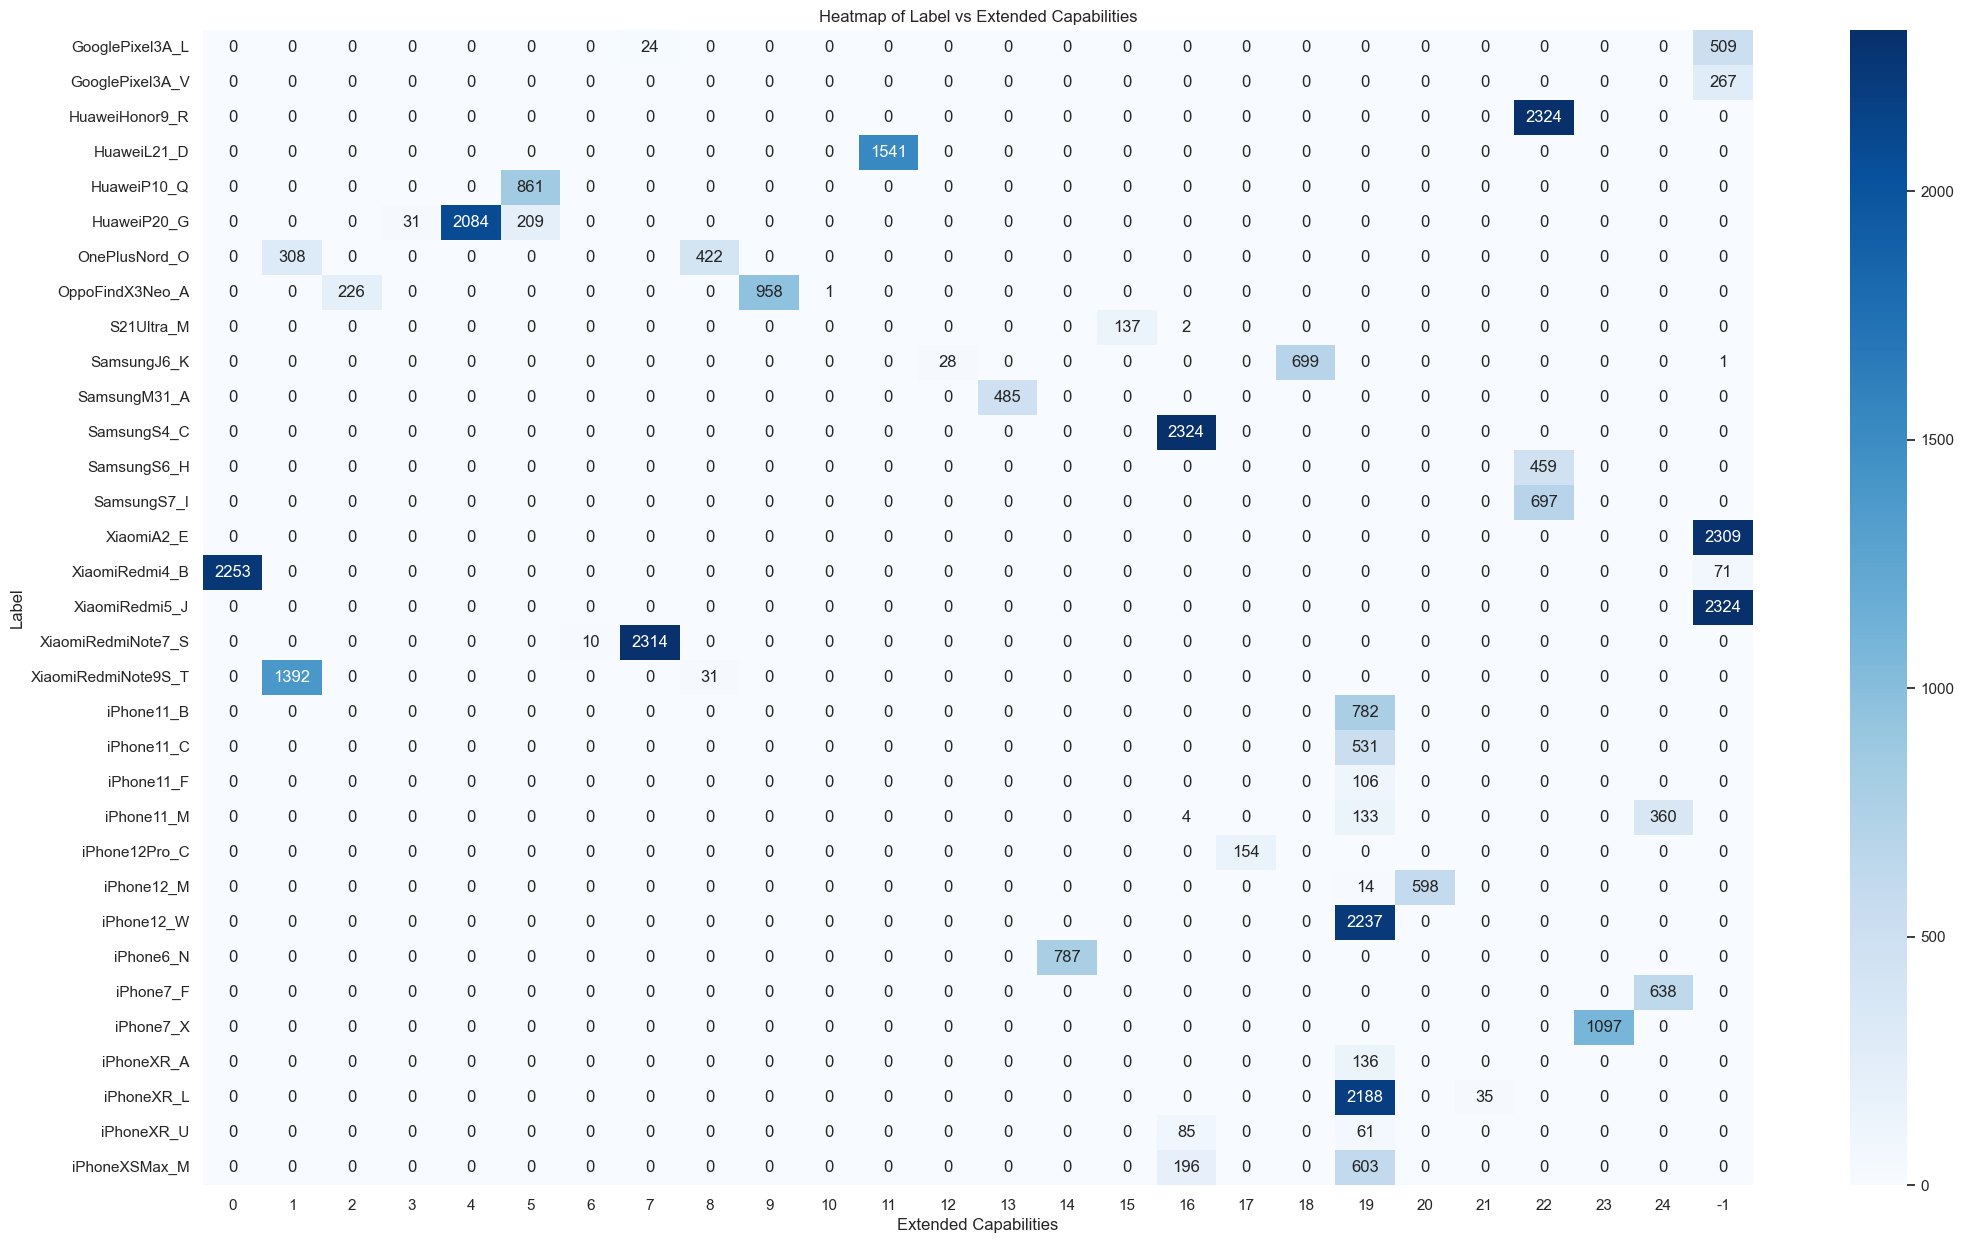

In [62]:
plotHelper.plot_heatmap(combined_df, "Label", "Extended Capabilities")

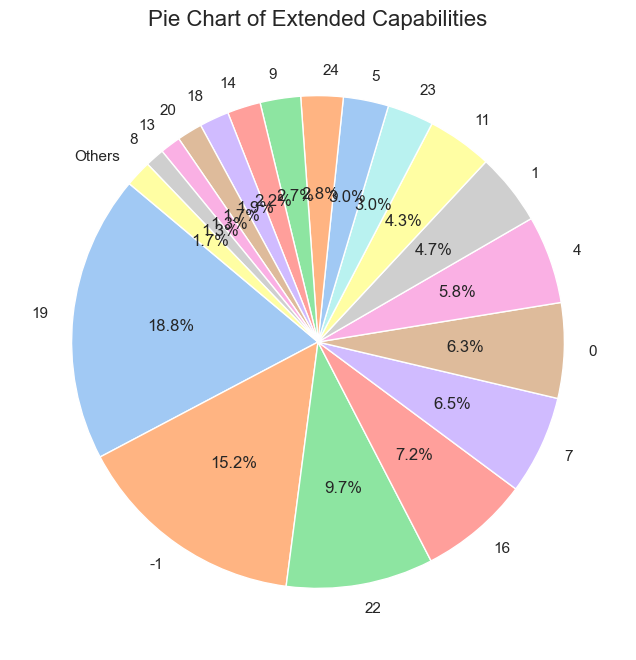

In [63]:
plotHelper.plot_pie_chart(combined_df, "Extended Capabilities", other_percentage=0.01)

#### VHT Capabilities

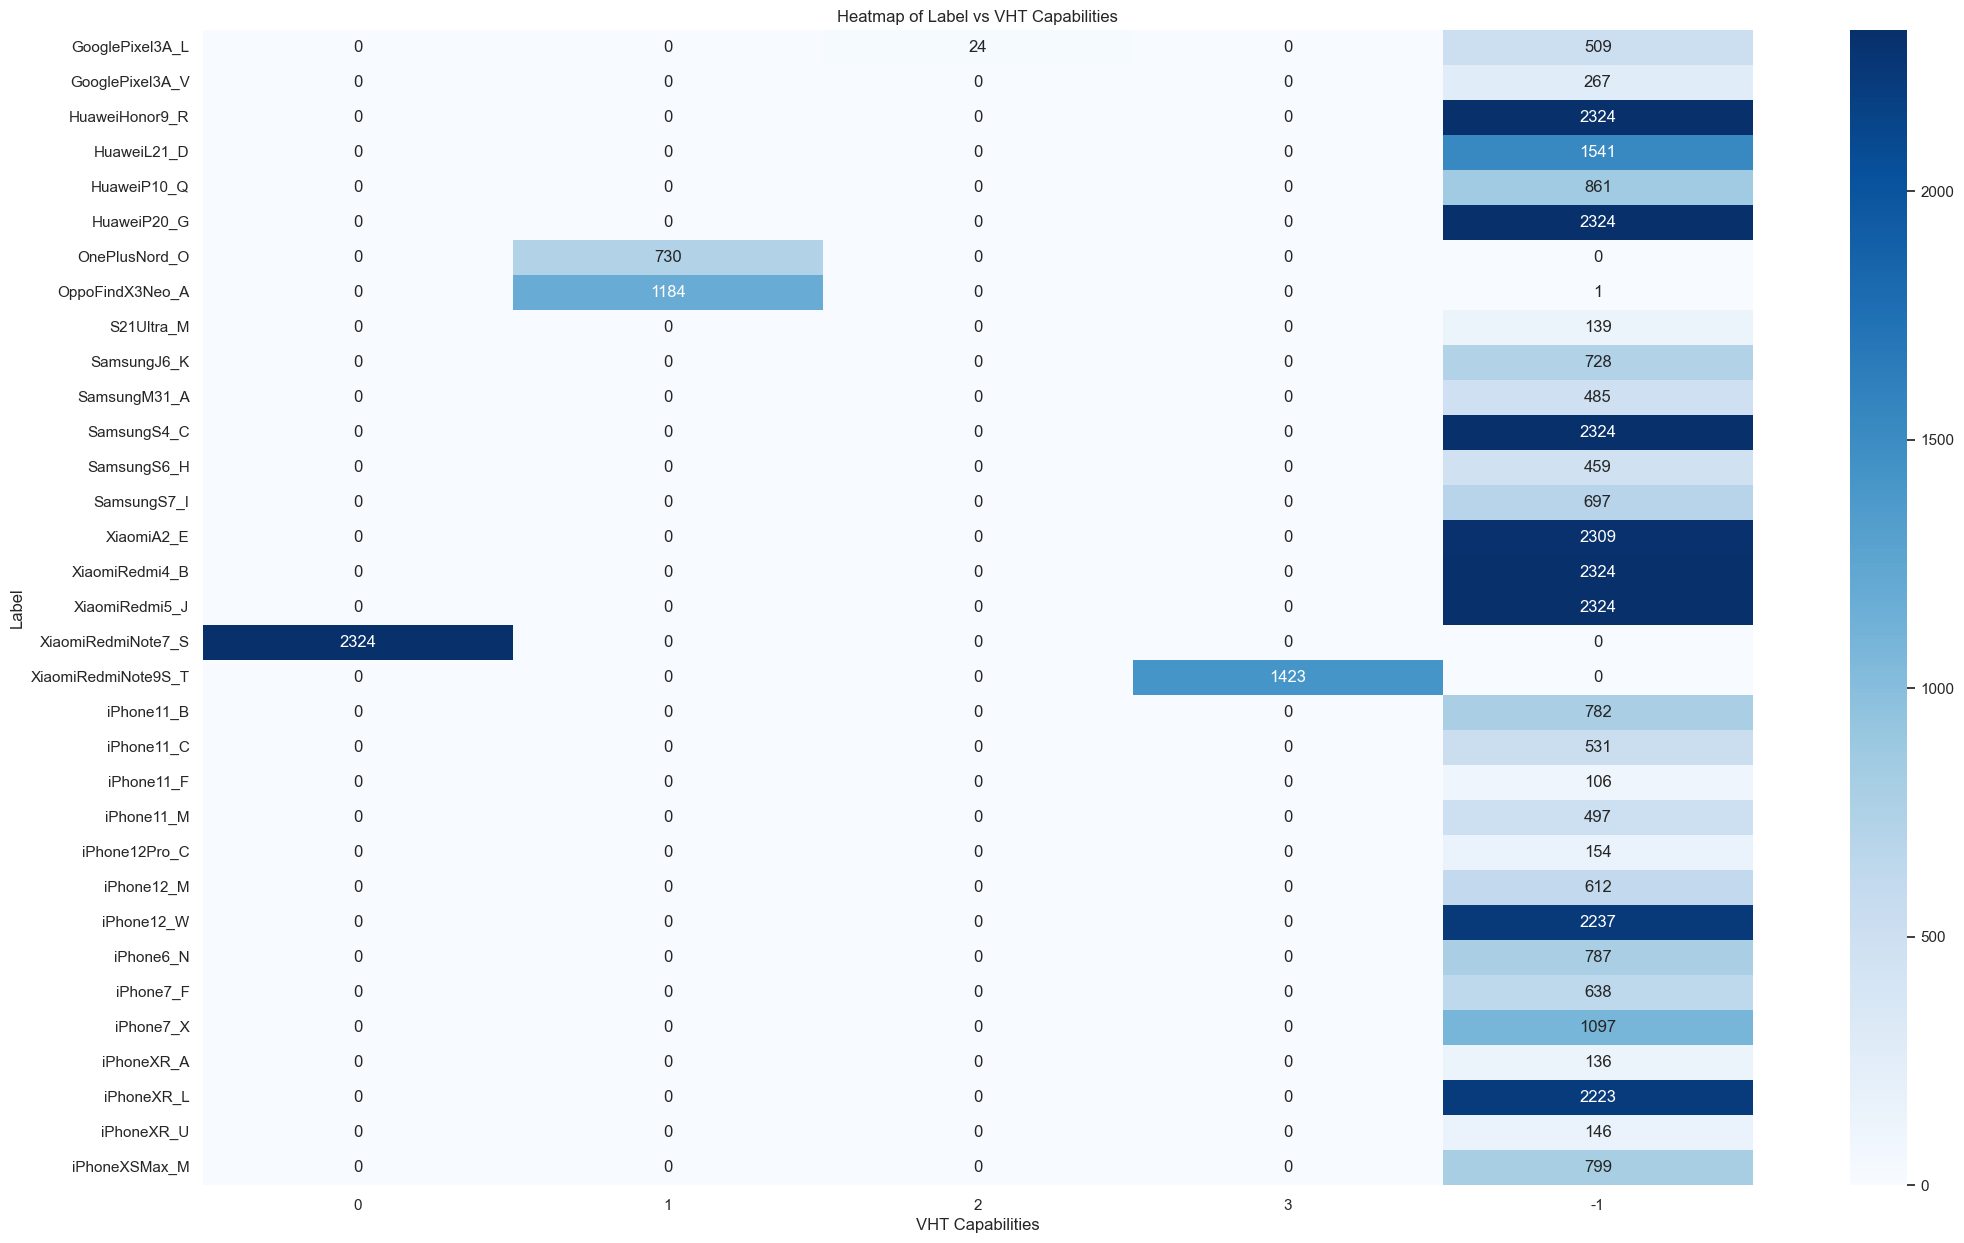

In [64]:
plotHelper.plot_heatmap(combined_df, "Label", "VHT Capabilities")

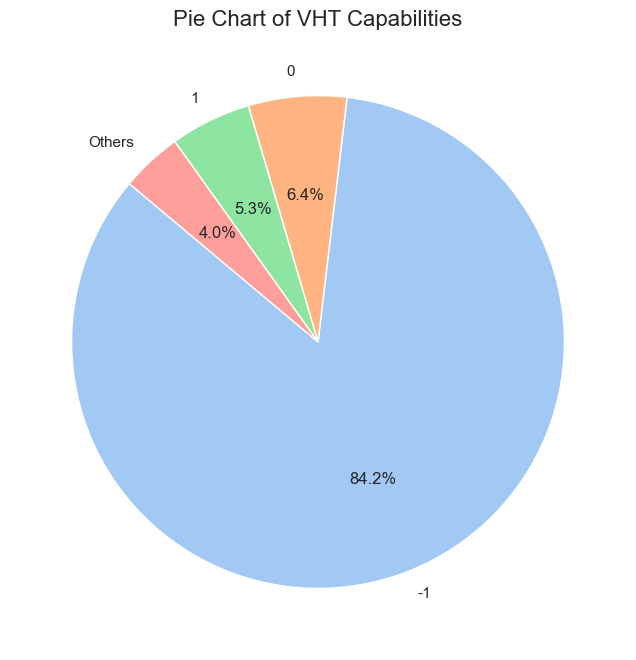

In [65]:
plotHelper.plot_pie_chart(combined_df, "VHT Capabilities")